计算方法 第一次上机作业
======================

杨耕智 19300180112
---------------------------------

本次作业都使用  MATLAB 进行编程.

1. 习题 1 所用程序见于
    - .$\backslash$CODES$\backslash$Exercise1.m


2. 习题 2 所用程序见于
    - .$\backslash$CODES$\backslash$Exercise2_1.m
    - .$\backslash$CODES$\backslash$Exercise2_2.m
    - .$\backslash$CODES$\backslash$Exercise2_3.m


3. 习题 3 所用程序见于
    - .$\backslash$CODES$\backslash$Exercise3_1.m
    - .$\backslash$CODES$\backslash$Exercise3_2.m
    - .$\backslash$CODES$\backslash$Exercise3_3.m
    - .$\backslash$CODES$\backslash$Exercise3_4.m
    - .$\backslash$CODES$\backslash$Exercise3_5.m
    - .$\backslash$CODES$\backslash$Exercise3_6.m
    - .$\backslash$CODES$\backslash$Exercise3_7.m

### 第一题
找一个充分大的正数 $a$, 用3种以上不同公式求解

$$x^2-ax+1=0$$

的两个根，和 MATLAB 求根函数的结果进行比较，并作简单分析.

**解**

为简单考虑, 我们先设 $a = 1000$.

为方便比较结果, 先使用 MATLAB 自带的 *roots* 函数进行求解:

In [1]:
format long

%使用 roots 函数
P = [1, -1000, 1];

tic
a = roots(P);
toc 

disp(a)

历时 0.040659 秒。
   1.0e+02 *

   9.999989999989999
   0.000010000010000




容易看到, 使用 MATLAB 中 *roots* 函数所求得的两根为

$$x_1 = 999.9989999989999,$$
$$x_2 = 0.000010000010000.$$

接下来我们使用 3 种不同的方法求解该方程. 并对每一种方法进行简单分析.

**1. 直接使用求根公式**
$$x_1 = \frac{a + \sqrt{a^2 - 4}}{2},$$
$$x_2 = \frac{a - \sqrt{a^2 - 4}}{2}$$
进行求解.

In [2]:
%直接使用求根公式进行求解
tic
x1_formula = (1000 + sqrt(1000^2 - 4))/2;
x2_formula = (1000 - sqrt(1000^2 - 4))/2;
toc

disp(x1_formula)
disp(x2_formula)

历时 0.000143 秒。
     9.999989999990000e+02

   0.001000001000023




于是直接使用求根公式得到的两根为

$$x_1^{\text{fomula}} = 999.9989999990000,$$

$$x_2^{\text{fomula}} = 0.001000001000023.$$

且执行时长为 0.000851 秒.

#### 方法 1 之简单分析

In [3]:
% 计算两个方法得到结果之间差距
disp(abs(999.9989999990000 - 999.9989999989999))
disp(abs(0.001000001000023 - 0.000010000010000))

     1.136868377216160e-13

     9.900009900230000e-04




可以观察到

$$10^{-13} \leq |x_1 - x_1^{\text{fomula}}| \leq 10^{-12},$$

$$10^{-4} \leq |x_2 - x_2^{\text{fomula}}| \leq 10^{-3}.$$

明显地, 直接利用求根公式的计算时间较长, 并且较小根之间有较大差距. 并且由于 $\sqrt{a^2-4}$ 需要近似地取某个值, 这可能引起较小根的有效数字消去.

为说明有效数字可能被消去, 先计算 $\sqrt{a^2-4}$ :

In [4]:
% 计算
disp(sqrt(1000^2 - 4))

     9.999979999980000e+02




这里我们不妨取 $\sqrt{a^2-4} = 999.998$, 共有 6 位有效数字. 这时用求根公式就计算得

$$x_2^{\text{fomula}} = \frac{1000-999.998}{2} = 0.001,$$

仅 1 位有效数字.

**2. 观察两根间关系**

由 Vieta 定理我们知道:

$$x_1 x_2 = 1.$$

故使用求根公式解出一根后, 可利用上述关系式求解另一根.
但注意到一开始选择解出哪一个根可能对最终结果有影响, 故下面我们写出两种结果.

+ 解出
$$x_1 = \frac{a + \sqrt{a^2 - 4}}{2},$$
再得到
$$x_2 = \frac{1}{x_1}.$$

In [5]:
%由两根间关系进行求解--Relation1
tic
x1_relation1 = (1000 + sqrt(1000^2 - 4))/2;
x2_relation1 = 1 / x1_relation1;
toc

disp(x1_relation1)
disp(x2_relation1)

历时 0.000213 秒。
     9.999989999990000e+02

   0.001000001000002




+ 解出
$$x_2 = \frac{a - \sqrt{a^2 - 4}}{2},$$
再得到
$$x_1 = \frac{1}{x_2}.$$

In [6]:
%由两根间关系进行求解--Relation2
tic
x2_relation2 = (1000 - sqrt(1000^2 - 4))/2;
x1_relation2 = 1/ x2_relation2;
toc

disp(x1_relation2)
disp(x2_relation2)

历时 0.000258 秒。
     9.999989999783788e+02

   0.001000001000023




用这种方法得到的根分别为

$$x_1^{\text{Relation1}} = 999.9989999990000, \quad x_2^{\text{Relation1}} = 0.001000001000002,$$

$$x_1^{\text{Relation2}} = 999.9989999783788, \quad x_2^{\text{Relation2}} = 0.001000001000023.$$

MATLAB 的 *roots* 函数解为

$$x_1 = 999.9989999989999 \quad x_2 = 0.000010000010000.$$

#### 方法 2 之简单分析

我们先来计算解之间的差距:

In [7]:
%计算解之间的差距
x1 = 999.9989999989999;
x2 = 0.000010000010000;

disp(abs(x1 - x1_relation1))
disp(abs(x2 - x2_relation1))
disp(abs(x1 - x1_relation2))
disp(abs(x2 - x2_relation2))

     1.136868377216160e-13

     9.900009900020001e-04

     2.062108706013532e-08

     9.900009900226212e-04




即得到

$$|x_1 - x_1^{\text{Relation1}}| = 1.136868377216160 \times 10^{-13},$$

$$|x_2 - x_2^{\text{Relation1}}| = 9.900009900020001 \times 10^{-4},$$

$$|x_1 - x_1^{\text{Relation2}}| = 2.062108706013532 \times 10^{-8},$$

$$|x_2 - x_2^{\text{Relation2}}| = 9.900009900226212 \times 10^{-4}.$$

方法 2 比使用 *roots* 函数所用的时间略长, 并且能够看到先计算大根 $x_1$ 再计算小根 $x_2$ 能够与 *roots* 函数之输出更接近. 使用方法 2 解决了有效数字不足的问题, 是值得采用的方法.

为说明其解决了有效数字不足的问题, 我们手动进行一些计算. 我们仍取 $\sqrt{a^2-4} = 999.998$. 由此知

$$x_1^{\text{Relation1}} = 999.999.$$

于是

$$x_2^{\text{Relation1}} = 1/x_1^{\text{Relation1}} \approx 1/999.999 \approx 0.00100$$

就有三位有效数字.

**3. 使用迭代法求解**

由上面的结果, 我们不妨设 $x^0 =0.1$
或者 $x^0 = 990$
以此作为迭代的初始值. 其中上标用以表示迭代的次数.

现在方程为

$$x^2 - 1000x + 1 = 0,$$

这等价于

$$(x - 500)^2 = 249999.$$

于是设 $y^0 = x^0 - 500$, $(y^0 + \Delta y^0)^2 = 24999$. 展开并略去 $(\Delta y^0)^2$ 后知

$$\Delta y^0 = \frac{1}{2}(\frac{249999}{y^0}-y^0).$$

于是得迭代表达式

$$y^{n+1} = y^n + \Delta y^n = y^n + \frac{1}{2}(\frac{249999}{y^n}-y^n).$$

In [8]:
%使用迭代法
y1 = 490; %初始化一个较大的值, 以获取较大根
error = 10; %初始化一个较大的误差

tic
while error > 0.00000001
    error  = 0.5*((249999/y1) - y1);
    y1 = y1 + error;
end
toc

x1_iteration = y1 + 500;
disp(y1 + 500)

历时 0.000167 秒。
     9.999990104050614e+02




In [9]:
%使用迭代法
y2 = -499.9; %初始化一个较小的值, 以获取较小根
error = 10; %初始化一个较大的误差

tic
while error > 0.00000001
    error  = 0.5*((249999/y2) - y2);
    y2 = y2 + error;
end
toc

x2_iteration = y2 + 500;
disp(y2 + 500)

历时 0.000127 秒。
     9.901980396307408e-04




#### 方法 3 之简单分析

使用方法 3 解得的两根为

$$x_1^{\text{iteration}} = 999.9990104050614,$$

$$x_2^{\text{iteration}} = 9.901980396307408.$$

In [10]:
%计算解之间差距
disp(abs(x1-x1_iteration))
disp(abs(x2-x2_iteration))

     1.040606150581880e-05

     9.801980296307408e-04




由上述计算得方法 3 与 *roots* 函数之计算结果的差为

$$|x_1 - x_1^{\text{iteration}}| = 1.040606150581880 \times 10^{-5},$$

$$|x_2 - x_2^{\text{iteration}}| = 9.801980296307408 \times 10^{-4}.$$

使用方法 3 计算的时间比使用 *roots* 函数略长, 产生的误差也比 方法 1, 2 大. 理论上来说使用方法 3 可以无限接近于真实解, 但由于舍入误差的存在, 最终得到的结果总与真实值有一个较为固定的误差.

### 第二题
用2种以上方法编写计算

$$\frac{\mathrm{e}^x-1}{x}$$

的程序. 构造一个趋于0的正数序列$\{x_n\}$, 列表显示不同方法的计算结果, 并作简单分析.

#### 方法1

这里先使用 *linspace* 函数生成 0.00000001 至 0.001 中的 100000 个点, 再把这些点直接代入计算 $\displaystyle\frac{\mathrm{e}^x-1}{x}$.

接下来的代码实现了以上说法, 输出最后十个值(倒序)并绘出图像.

   0.000000010000000   0.999999993922529

   0.000000020000000   1.000000005024759

   0.000000030000000   1.000000016126989

   0.000000040000000   1.000000021678105

   0.000000050000000   1.000000025008774

   0.000000060000000   1.000000030929963

   0.000000070000000   1.000000035159384

   0.000000080000000   1.000000041107008

   0.000000090000000   1.000000045732937




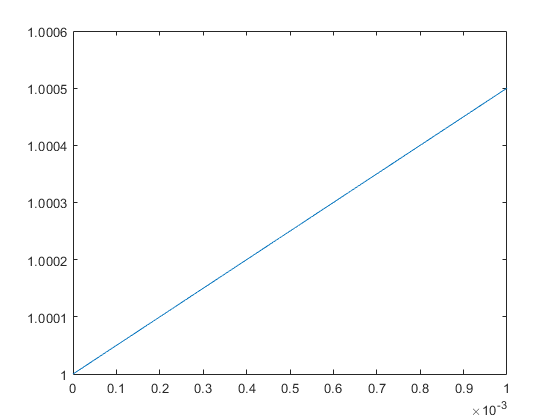

In [11]:
x_list = linspace(0.00000001, 0.001, 100000);
y_list = [];

for i = x_list

    if i < 0.0000001
        disp([i (exp(i)-1)/i])
    end
    
    y_list = [y_list, (exp(i)-1)/i];
end

plot(x_list, y_list);
axis([0 0.001 1 1.0006])

#### 方法2

这里先使用 *linspace* 函数生成 0.00000001 至 0.001 中的 100000 个点, 再计算每个点对应的 exp 值 $t$, 最终代入到 $\displaystyle\frac{t-1}{\log(t)}$.

接下来的代码实现了以上说法, 输出最后十个值(倒序)并绘出图像.

   0.000000010000000   1.000000010000000

   0.000000020000000   1.000000020000000

   0.000000030000000   1.000000030000000

   0.000000040000000   1.000000040000001

   0.000000050000000   1.000000050000001

   0.000000060000000   1.000000060000002

   0.000000070000000   1.000000070000002

   0.000000080000000   1.000000080000003

   0.000000090000000   1.000000090000004




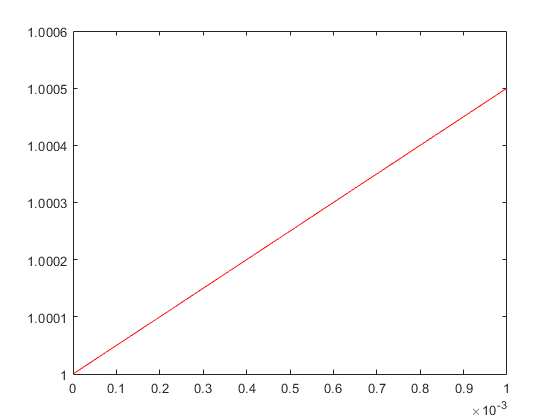

In [12]:
x_list = linspace(0.00000001, 0.001, 100000);
y_list2 = [];

for i = x_list
    t = exp(i);
    
    if i < 0.0000001
        disp([i, t])
    end
    
    y_list2 = [y_list2, (t-1)/log(t)];
end

plot(x_list, y_list2, 'r');

#### 简单分析

先列表:

| x | 方法1 | 方法2 |
| :----: | :----: | :----: |
| 0.00000001 | 0.999999993922529 | 1.000000010000000 |
| 0.00000002 | 1.000000005024759 | 1.000000020000000 |
| 0.00000003 | 1.000000016126989 | 1.000000030000000 |
| 0.00000004 | 1.000000021678105 | 1.000000040000001 |
| 0.00000005 | 1.000000025008774 | 1.000000050000001 |
| 0.00000006 | 1.000000030929963 | 1.000000060000002 |
| 0.00000007 | 1.000000035159384 | 1.000000070000002 |
| 0.00000008 | 1.000000041107008 | 1.000000080000003 |
| 0.00000009 | 1.000000045732937 | 1.000000090000004 |

由上面的绘图, 我们发现两种方法都基本上是沿直线趋向于 1 的. 直接看表格不方便观察, 我们不妨绘制距离 0 相当近的一些点来观察其关系.

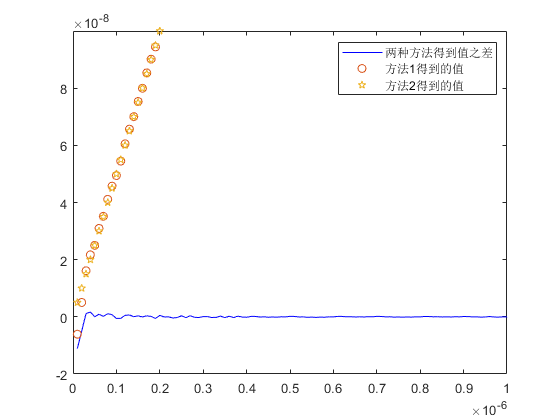

In [13]:
plot(x_list, y_list-y_list2, 'b')
hold on;
plot(x_list, y_list-1,'o')
hold on;
plot(x_list, y_list2-1,'p')
axis([0 0.000001 -0.00000002 0.0000001])
legend('两种方法得到值之差','方法1得到的值','方法2得到的值')

可以看到两种方法在这个问题下效果差距不大.

### 第三题
画图显示
$$(x-2)^9$$
及其展开式（用秦九韶公式）在2的一个小邻域内计算结果.

我们先得到 $(x-2)^9$ 之展开式:

In [14]:
%获得展开式
syms x
fx = (x - 2)^9;
expand(fx)

 
ans =
 
x^9 - 18*x^8 + 144*x^7 - 672*x^6 + 2016*x^5 - 4032*x^4 + 5376*x^3 - 4608*x^2 + 2304*x - 512
 



故其展开式为

$$(x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512.$$



首先我们来使用展开式绘制 $\mathrm{B}_{0.1}(2)$ 内此多项式的图像.

历时 2.536450 秒。



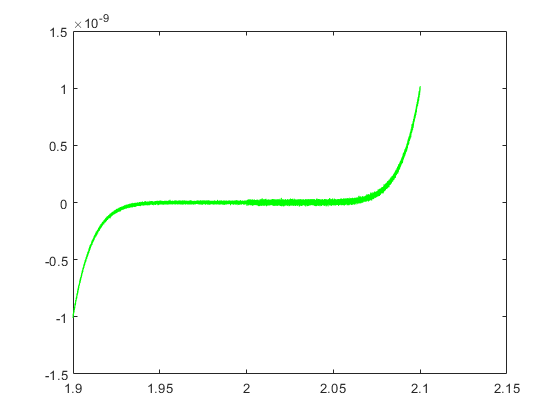

In [15]:
% 直接使用展开式
x_list = linspace(1.9, 2.1, 100000);

y0 = [];

tic
for x = x_list
    y0 = [y0, x^9 - 18*x^8 + 144*x^7 - 672*x^6 + 2016*x^5 - 4032*x^4 + 5376*x^3 - 4608*x^2 + 2304*x - 512];
end
toc

plot(x_list, y0, 'g')

接下来我们使用秦九韶公式进行绘制:

历时 2.450983 秒。



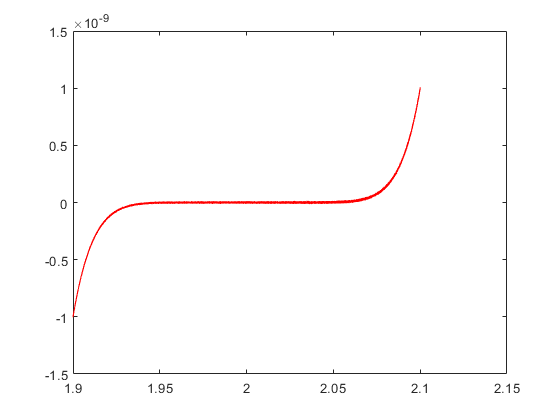

In [16]:
%使用秦九韶公式
x = linspace(1.9, 2.1, 100000);
y1 = [];

tic
for i = x
    y1 = [y1, ((((((((i - 18)*i + 144)*i - 672)*i + 2016)*i - 4032)*i + 5376)*i - 4608)*i + 2304)*i - 512];
end
toc

plot(x, y1, 'r')
%axis([1.99 2.01 -10^(-10) 10^(-10)])

为方便对比, 我们也使用合并后的 $(x-2)^9$ 进行绘制:

历时 2.451318 秒。



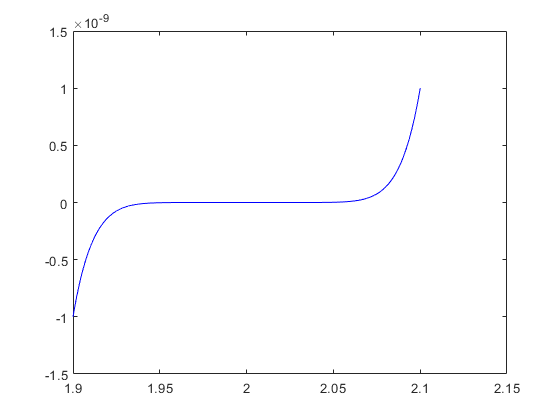

In [17]:
% 使用 (x-2)^9
x = linspace(1.9, 2.1, 100000);

y2 = [];

tic
for i = x
    y2 = [y2, (i - 2)^9];
end
toc

plot(x, y2, 'b')

由上面的图像, 我们已经发现三种方法绘制的图像在 2 附近有一定的抖动. 我们不妨进一步放大观察:

历时 0.037083 秒。



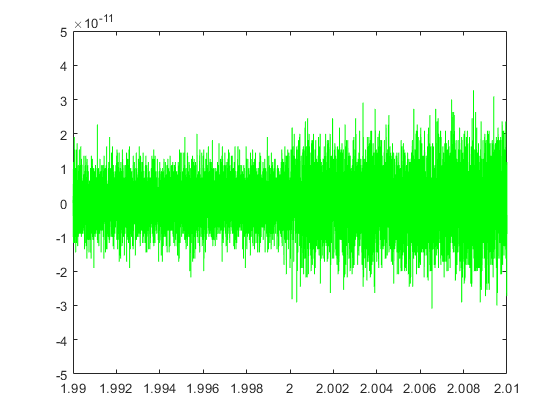

In [18]:
x_list = linspace(1.99, 2.01, 10000);

y0 = [];

tic
for x = x_list
    y0 = [y0, x^9 - 18*x^8 + 144*x^7 - 672*x^6 + 2016*x^5 - 4032*x^4 + 5376*x^3 - 4608*x^2 + 2304*x - 512];
end
toc

plot(x_list, y0, 'g')
axis([1.99 2.01 -5*10^(-11) 5*10^(-11)])

历时 0.028895 秒。



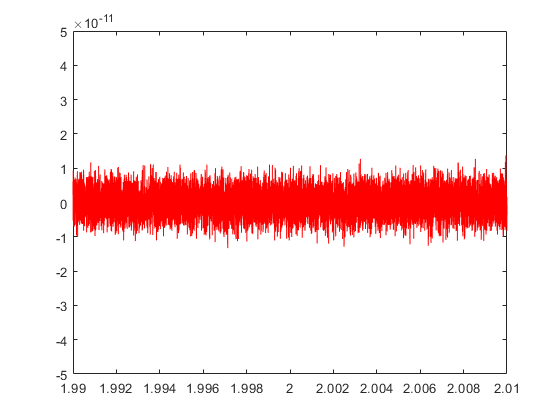

In [19]:
x = linspace(1.99, 2.01, 10000);
y1 = [];

tic
for i = x
    y1 = [y1, ((((((((i - 18)*i + 144)*i - 672)*i + 2016)*i - 4032)*i + 5376)*i - 4608)*i + 2304)*i - 512];
end
toc

plot(x, y1, 'r')
axis([1.99 2.01 -5*10^(-11) 5*10^(-11)])

历时 0.030012 秒。



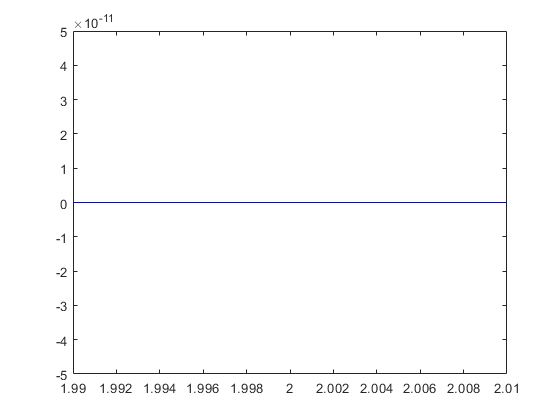

In [20]:
x = linspace(1.9, 2.1, 10000);

y2 = [];

tic
for i = x
    y2 = [y2, (i - 2)^9];
end
toc

plot(x, y2, 'b')
axis([1.99 2.01 -5*10^(-11) 5*10^(-11)])

容易发现, 在上述三种方法中, 无论是计算的时长, 图像抖动的幅度, 都是直接使用合并后的 $(x-2)^9$ 较好. 与此同时, 不是所有的多项式都能够被表述成类似 $(x-2)^9$ 这样简单的形式, 并且秦九韶算法相比于直接使用展开式, 计算时长和精确度都有很大程度的提升. 上述结果确实说明了秦九韶算法相比于直接计算展开式的优越性.